
<h1 align=left><font size = 5>Exploratory Data Analysis Report</font></h1>

Capstone Project: Insurance Company Benchmark

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya 

Dataset: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data
Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29


 Import libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas-profiling
import pandas_profiling


load data and store in dataframe InsData_ori:

In [3]:
df_ori = pd.read_csv("/content/ticdata2000.txt",  delimiter = "\t",header=None)
df_ori.head()



0   1   2   3   4   5   6   7   8   9   ...  76  77  78  79  80  81  82  \
0  33   1   3   2   8   0   5   1   3   7  ...   0   0   0   1   0   0   0   
1  37   1   2   2   8   1   4   1   4   6  ...   0   0   0   1   0   0   0   
2  37   1   2   2   8   0   4   2   4   3  ...   0   0   0   1   0   0   0   
3   9   1   3   3   3   2   3   2   4   5  ...   0   0   0   1   0   0   0   
4  40   1   4   2  10   1   4   1   4   7  ...   0   0   0   1   0   0   0   

   83  84  85  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 86 columns]

In [4]:
# add column headings
# column names from the data dictionary
#df_ori.columns=['MOSTYPE',	'MAANTHUI',	'MGEMOMV',	'MGEMLEEF',	'MOSHOOFD',	'MGODRK',	'MGODPR',	'MGODOV',	'MGODGE',	'MRELGE',	'MRELSA',	'MRELOV',	'MFALLEEN',	'MFGEKIND',	'MFWEKIND',	'MOPLHOOG',	'MOPLMIDD',	'MOPLLAAG',	'MBERHOOG',	'MBERZELF',	'MBERBOER',	'MBERMIDD',	'MBERARBG',	'MBERARBO',	'MSKA',	'MSKB1',	'MSKB2',	'MSKC',	'MSKD',	'MHHUUR',	'MHKOOP',	'MAUT1',	'MAUT2',	'MAUT0',	'MZFONDS',	'MZPART',	'MINKM30',	'MINK3045',	'MINK4575',	'MINK7512',	'MINK123M',	'MINKGEM',	'MKOOPKLA',	'PWAPART',	'PWABEDR',	'PWALAND',	'PPERSAUT',	'PBESAUT',	'PMOTSCO',	'PVRAAUT',	'PAANHANG',	'PTRACTOR',	'PWERKT',	'PBROM',	'PLEVEN',	'PPERSONG',	'PGEZONG',	'PWAOREG',	'PBRAND',	'PZEILPL',	'PPLEZIER',	'PFIETS',	'PINBOED',	'PBYSTAND',	'AWAPART',	'AWABEDR',	'AWALAND',	'APERSAUT',	'ABESAUT',	'AMOTSCO',	'AVRAAUT',	'AAANHANG',	'ATRACTOR',	'AWERKT',	'ABROM',	'ALEVEN',	'APERSONG',	'AGEZONG',	'AWAOREG',	'ABRAND',	'AZEILPL',	'APLEZIER',	'AFIETS',	'AINBOED',	'ABYSTAND',	'CARAVAN']
# English coulmn names for ease of reference. 1 - 43 are demographic varaibles (column name with prefix sd_), values based on zip code.
#44-86 are product ownership of insurance customers (column name with prefix po_).  target varaible : po_ins_pol_caravan
#df_ori.columns=['cust_subtype',	'no_of_houses',	'avg_household',	'avg_age_band',	'cust_maintype',	'religion_catholic',	'religion_protestant',	'religion_other',	'religion_no',	'rel_married',	'rel_living_tg',	'rel_other',	'rel_no_singles',	'hshold_wo_children',	'hshold_w_children',	'education_higher',	'education_medium',	'education_lower',	'empst_high',	'empst_Entrepr ',	'empst_farmer',	'empst_mdl_mgmt',	'empst_skill_labour',	'empst_unskill_labour',	'socialclassA',	'socialclassB1',	'socialclassB2',	'socialclassC',	'socialclassD',	'rentedhouse',	'homeowners',	'car_1',	'car_2',	'car_0',	'health_ins_national',	'health_ins_private',	'income_l_30k',	'income_30k_45k',	'income_45k_75k',	'income_75k_122k',	'income_g_123k',	'income_avg',	'p_power_class',	'ins_pol_thirdparty_pvt',	'ins_pol_thirdparty_firms',	'ins_pol_thirdparty_agri',	'ins_pol_car',	'ins_pol_del_van',	'ins_pol_motorcycle_sc',	'ins_pol_lorry',	'ins_pol_trailer',	'ins_pol_tractor',	'ins_pol_agri_machines',	'ins_pol_moped',	'ins_pol_life',	'ins_pol_accident_ins_pvt',	'ins_pol_accident_ins_fam',	'ins_pol_disability',	'ins_pol_fire',	'ins_pol_surfboard',	'ins_pol_boat',	'ins_pol_bicycle',	'ins_pol_property',	'ins_pol_social security',	'no_ins_pol_thirdparty_pvt',	'no_ins_pol_thirdparty_firms',	'no_ins_pol_thirdparty_agri',	'no_ins_pol_car',	'no_ins_pol_del_van',	'no_ins_pol_motorcycle_sc',	'no_ins_pol_lorry',	'no_ins_pol_trailer',	'no_ins_pol_tractor',	'no_ins_pol_agri_machines',	'no_ins_pol_moped',	'no_ins_pol_life',	'no_ins_pol_accident_ins_pvt',	'no_ins_pol_accident_ins_fam',	'no_ins_pol_disability',	'no_ins_pol_fire',	'no_ins_pol_surfboard',	'no_ins_pol_boat',	'no_ins_pol_bicycle',	'no_ins_pol_property',	'no_ins_pol_social security',	'no_ins_pol_caravan']
df_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr ' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ,	'po_ins_pol_caravan']

df_ori


sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
0                  33                1                 3                2   
1                  37                1                 2                2   
2                  37                1                 2                2   
3                   9                1                 3                3   
4                  40                1                 4                2   
...               ...              ...               ...              ...   
5817               36                1                 1                2   
5818               35                1                 4                4   
5819               33                1                 3                4   
5820               34                1                 3                2   
5821               33                1                 3                3   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
0                    8                     0                       5   
1                    8                     1                       4   
2                    8                     0                       4   
3                    3                     2                       3   
4                   10                     1                       4   
...                ...                   ...                     ...   
5817                 8                     0                       6   
5818                 8                     1                       4   
5819                 8                     0                       6   
5820                 8                     0                       7   
5821                 8                     0                       6   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
0                     1               3               7  ...   
1                     1               4               6  ...   
2                     2               4               3  ...   
3                     2               4               5  ...   
4                     1               4               7  ...   
...                 ...             ...             ...  ...   
5817                  1               2               1  ...   
5818                  1               4               6  ...   
5819                  0               3               5  ...   
5820                  0               2               7  ...   
5821                  1               2               7  ...   

      po_no_ins_pol_accident_ins_pvt  po_no_ins_pol_accident_ins_fam  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   
...                              ...                             ...   
5817                               0                               0   
5818                               0                               0   
5819                               0                               0   
5820                               0                               0   
5821                               0                               0   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
0                            0                   1                        0   
1                            0                   1                        0   
2                            0                   1                        0   
3                            0                   1                        0   
4                            0                   1                        0   
...                        ...                 ...                      ...   
5817                         

In [ ]:
print('no of records and columns ',df_ori.shape)
# list the data types for each column
df_ori.dtypes

no of records and columns  (5822, 86)


sd_cust_subtype                  int64
sd_no_of_houses                  int64
sd_avg_household                 int64
sd_avg_age_band                  int64
sd_cust_maintype                 int64
                                 ...  
po_no_ins_pol_boat               int64
po_no_ins_pol_bicycle            int64
po_no_ins_pol_property           int64
po_no_ins_pol_social security    int64
po_ins_pol_caravan               int64
Length: 86, dtype: object

In [ ]:
df_x=df_ori.iloc[:,0:8]
df_x.dtypes

sd_cust_subtype           int64
sd_no_of_houses           int64
sd_avg_household          int64
sd_avg_age_band           int64
sd_cust_maintype          int64
sd_religion_catholic      int64
sd_religion_protestant    int64
sd_religion_other         int64
dtype: object

In [ ]:
#  Get Exploratory data analysis report.
!pip install pandas-profiling
import pandas_profiling

In [ ]:
# full profile report
profile = df_ori.profile_report(title='Pandas Profiling Report - Complete report')
profile.to_file(output_file="Pandas Profiling Report - complete report — Insurance Benchmark .html")

In [ ]:
# since the dataframe is too large, we produce profile report to view variable report. (corelation report will be generated separatly)
profile1 = df_ori.profile_report(title='Pandas Profiling Report',  minimal=True)
profile1


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile1.to_file(output_file="Pandas Profiling Report — Variable profile1 .html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

In [5]:
# drop duplicate rows
print("original file ", df_ori.shape)
df_2 = df_ori.drop_duplicates()
print("file after removing duplicate records  ", df_2.shape)

original file  (5822, 86)
file after removing duplicate records   (5220, 86)


602 duplicate records were removed.

In [6]:
# checking variable distribution after removing duplicates.
profile2 = df_2.profile_report(title='Pandas Profiling Report',  minimal=True)
profile2

Output hidden; open in https://colab.research.google.com to view.

In [7]:
profile2.to_file(output_file="Pandas Profiling Report — Variable profile2 - no duplicates .html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# distribution of target variable
df_2.po_ins_pol_caravan.value_counts()

0    4880
1     340
Name: po_ins_pol_caravan, dtype: int64

# Data Wrangling


Look at Caravan customers by zip code

since the sociodemographic data  variables are based on postal code, Here we are tryong to identify records from same postal code and give an arbitrary zipcode no.
This is to analyse variables by location, to find patterns in data.

In [9]:
# separate sociodemographic variables
df_sd = df_2[df_2.columns[pd.Series(df_2.columns).str.startswith('sd_')]]
columns = df_sd.columns.tolist()
df_2['sd_combined'] = df_2.apply(lambda x: '_'.join([str(x[i]) for i in columns]), axis=1)
# sort by combined
df_2=df_2.sort_values([ 'sd_combined'])

<ipython-input-9-1446acce5c00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['sd_combined'] = df_2.apply(lambda x: '_'.join([str(x[i]) for i in columns]), axis=1)


In [10]:
# create one column id_zipcode concaternating all sociodemographic  data.
df_2['id_zipcode'] = df_2.groupby('sd_combined', sort=False).ngroup() + 1
df_2.head(10)

sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
1536               10                1                 2                3   
4597               10                1                 2                3   
5723               10                1                 3                2   
261                10                1                 3                2   
3958               10                1                 3                2   
340                10                1                 3                2   
2527               10                1                 3                2   
3776               10                1                 3                2   
3783               10                1                 3                2   
4442               10                1                 3                2   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
1536                 3                     2                       1   
4597                 3                     2                       1   
5723                 3                     0                       4   
261                  3                     0                       4   
3958                 3                     0                       4   
340                  3                     0                       5   
2527                 3                     0                       5   
3776                 3                     0                       5   
3783                 3                     0                       5   
4442                 3                     0                       6   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
1536                  0               6               6  ...   
4597                  1               6               6  ...   
5723                  2               4               9  ...   
261                   2               4               9  ...   
3958                  2               4               9  ...   
340                   0               4               7  ...   
2527                  0               4               7  ...   
3776                  0               4               7  ...   
3783                  3               2               4  ...   
4442                  2               1               7  ...   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
1536                         0                   1                        0   
4597                         0                   1                        0   
5723                         0                   0                        0   
261                          0                   0                        0   
3958                         0                   1                        0   
340                          0                   1                        0   
2527                         0                   0                        0   
3776                         0                   0                        0   
3783                         0                   0                        0   
4442                         0                   1                        0   

      po_no_ins_pol_boat  po_no_ins_pol_bicycle  po_no_ins_pol_property  \
1536                   0                      0                       0   
4597                   0                      0                       0   
5723                   0                      0                       0   
261                    0                      1                       0   
3958                   0                      0                       0   
340                    0                      0                       0   
2527                   0                      0                       0   
3776                   0                      1                       0   
3783                   0                      0                       1   
4442                   0                

In [ ]:
# checking one sample
dd=df_2[df_2['id_zipcode'] == 1730]
dd[['sd_combined', 'id_zipcode']]

sd_combined  id_zipcode
1585  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
5126  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
5124  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
470   9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
181   9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
1254  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730

**Question** : How does Caravan Insurance ownership vary across different demographic areas?

record count (340, 2)
summary2 
 po_ins_pol_caravan
1    248
2     34
3      4
4      3
Name: po_ins_pol_caravan, dtype: int64




<Axes: title={'center': 'Locations with more than one Caravan customers '}, xlabel='id_zipcode'>

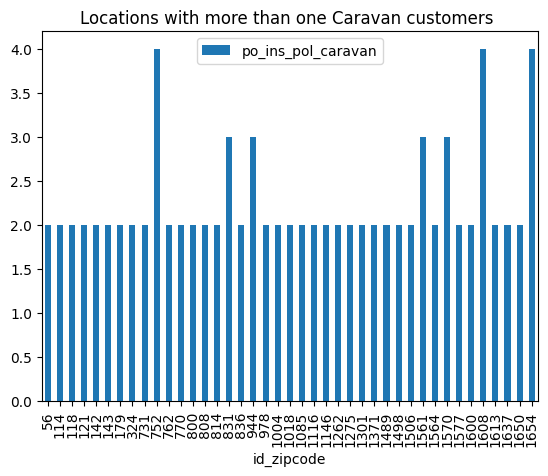

In [12]:
# Distribution of caravan policies by zipcode
#records of caravan policies
df_2_carv = df_2[df_2['po_ins_pol_caravan'] ==1][['po_ins_pol_caravan', 'id_zipcode']]
print("record count", df_2_carv.shape)
#df_2_carv.head(10)
plt.close("all")
summary1=df_2_carv.groupby(['id_zipcode']).count()
summary2=summary1.groupby(['po_ins_pol_caravan'])['po_ins_pol_caravan'].count()
print('summary2 \n', summary2)
print('\n')
summary3=df_2_carv.groupby(['id_zipcode']).filter(lambda x: x['po_ins_pol_caravan'].sum() > 1)
summary3.groupby(['id_zipcode']).count().plot(kind='bar', y='po_ins_pol_caravan', title="Locations with more than one Caravan customers ")
#summary2.plot(kind='bar', y='po_ins_pol_caravan')




What are social charactoristics of customers from areas with more than one poicy?

In [ ]:
# checking profile of caravan policies , target = 1 (348 records)
df_2_carv2 = df_2[df_2['po_ins_pol_caravan'] ==1]
df_2_carv3 = df_2_carv2[df_2.columns[pd.Series(df_2.columns).str.startswith('po_')]]
profile3 = df_2_carv3.profile_report(title='Pandas Profiling Report3',  minimal=True)
profile3

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile3.to_file(output_file="Pandas Profiling Report — Variable profile3 - caravan policies .html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

These varaibles have no contribution for caravan policies.

po_ins_pol_agri_machines,po_ins_pol_lorry,po_no_ins_pol_agri_machines, po_no_ins_pol_lorry

# Correlation

In [13]:
# we will drop these varaibles
df_3=df_2.drop(['po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry'],axis=1)
df_3.shape

(5220, 84)

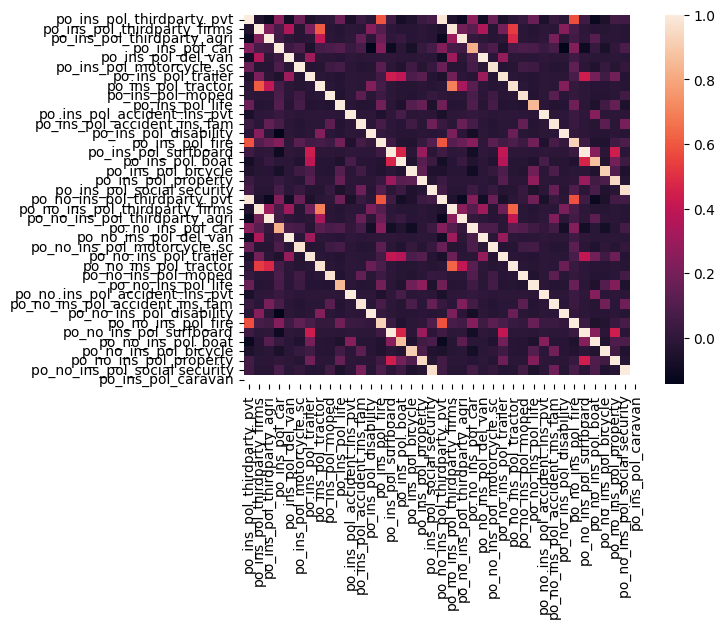

In [ ]:
#df_3a=df_ori.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,85]]

# checking corelation of product varibles of caravan customers. (target = 1)
df_3_carv2 = df_3[df_3['po_ins_pol_caravan'] ==1]
df_3_carv3 = df_3_carv2[df_3.columns[pd.Series(df_3.columns).str.startswith('po_')]]

corr1 = df_3_carv3.corr()
sns.heatmap(corr1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)
plt.savefig("corr_matrix_1_caravan_product_columns.png", dpi=300)

<ipython-input-14-e12a01b18a07>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df_3_carv3.corr()


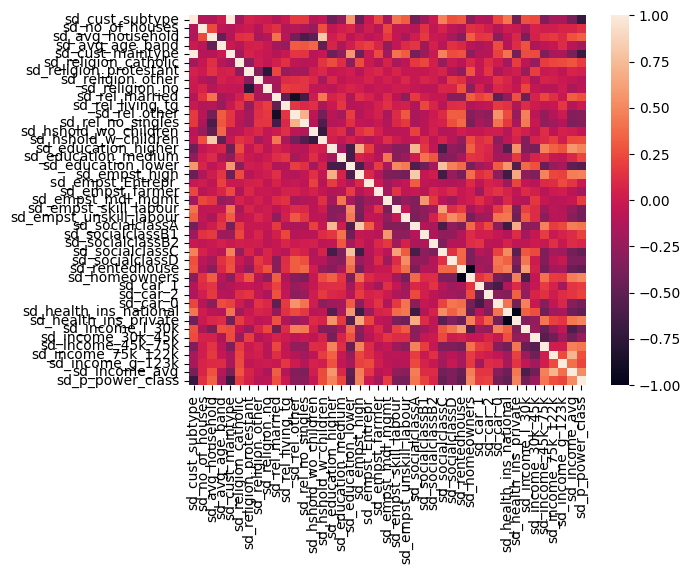

In [14]:
# checking corelation of sociodemographic  varibles of caravan customers. (target = 1)
df_3_carv2 = df_3[df_3['po_ins_pol_caravan'] ==1]
df_3_carv3 = df_3_carv2[df_3.columns[pd.Series(df_3.columns).str.startswith('sd_')]]

corr1 = df_3_carv3.corr()
sns.heatmap(corr1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)
plt.savefig("corr_matrix_1_caravan_product_columns.png", dpi=300)

In [16]:

print(df_3.po_ins_pol_property.value_counts())


0    5175
1      18
2      16
3       6
4       3
5       1
6       1
Name: po_ins_pol_property, dtype: int64


module://matplotlib_inline.backend_inline


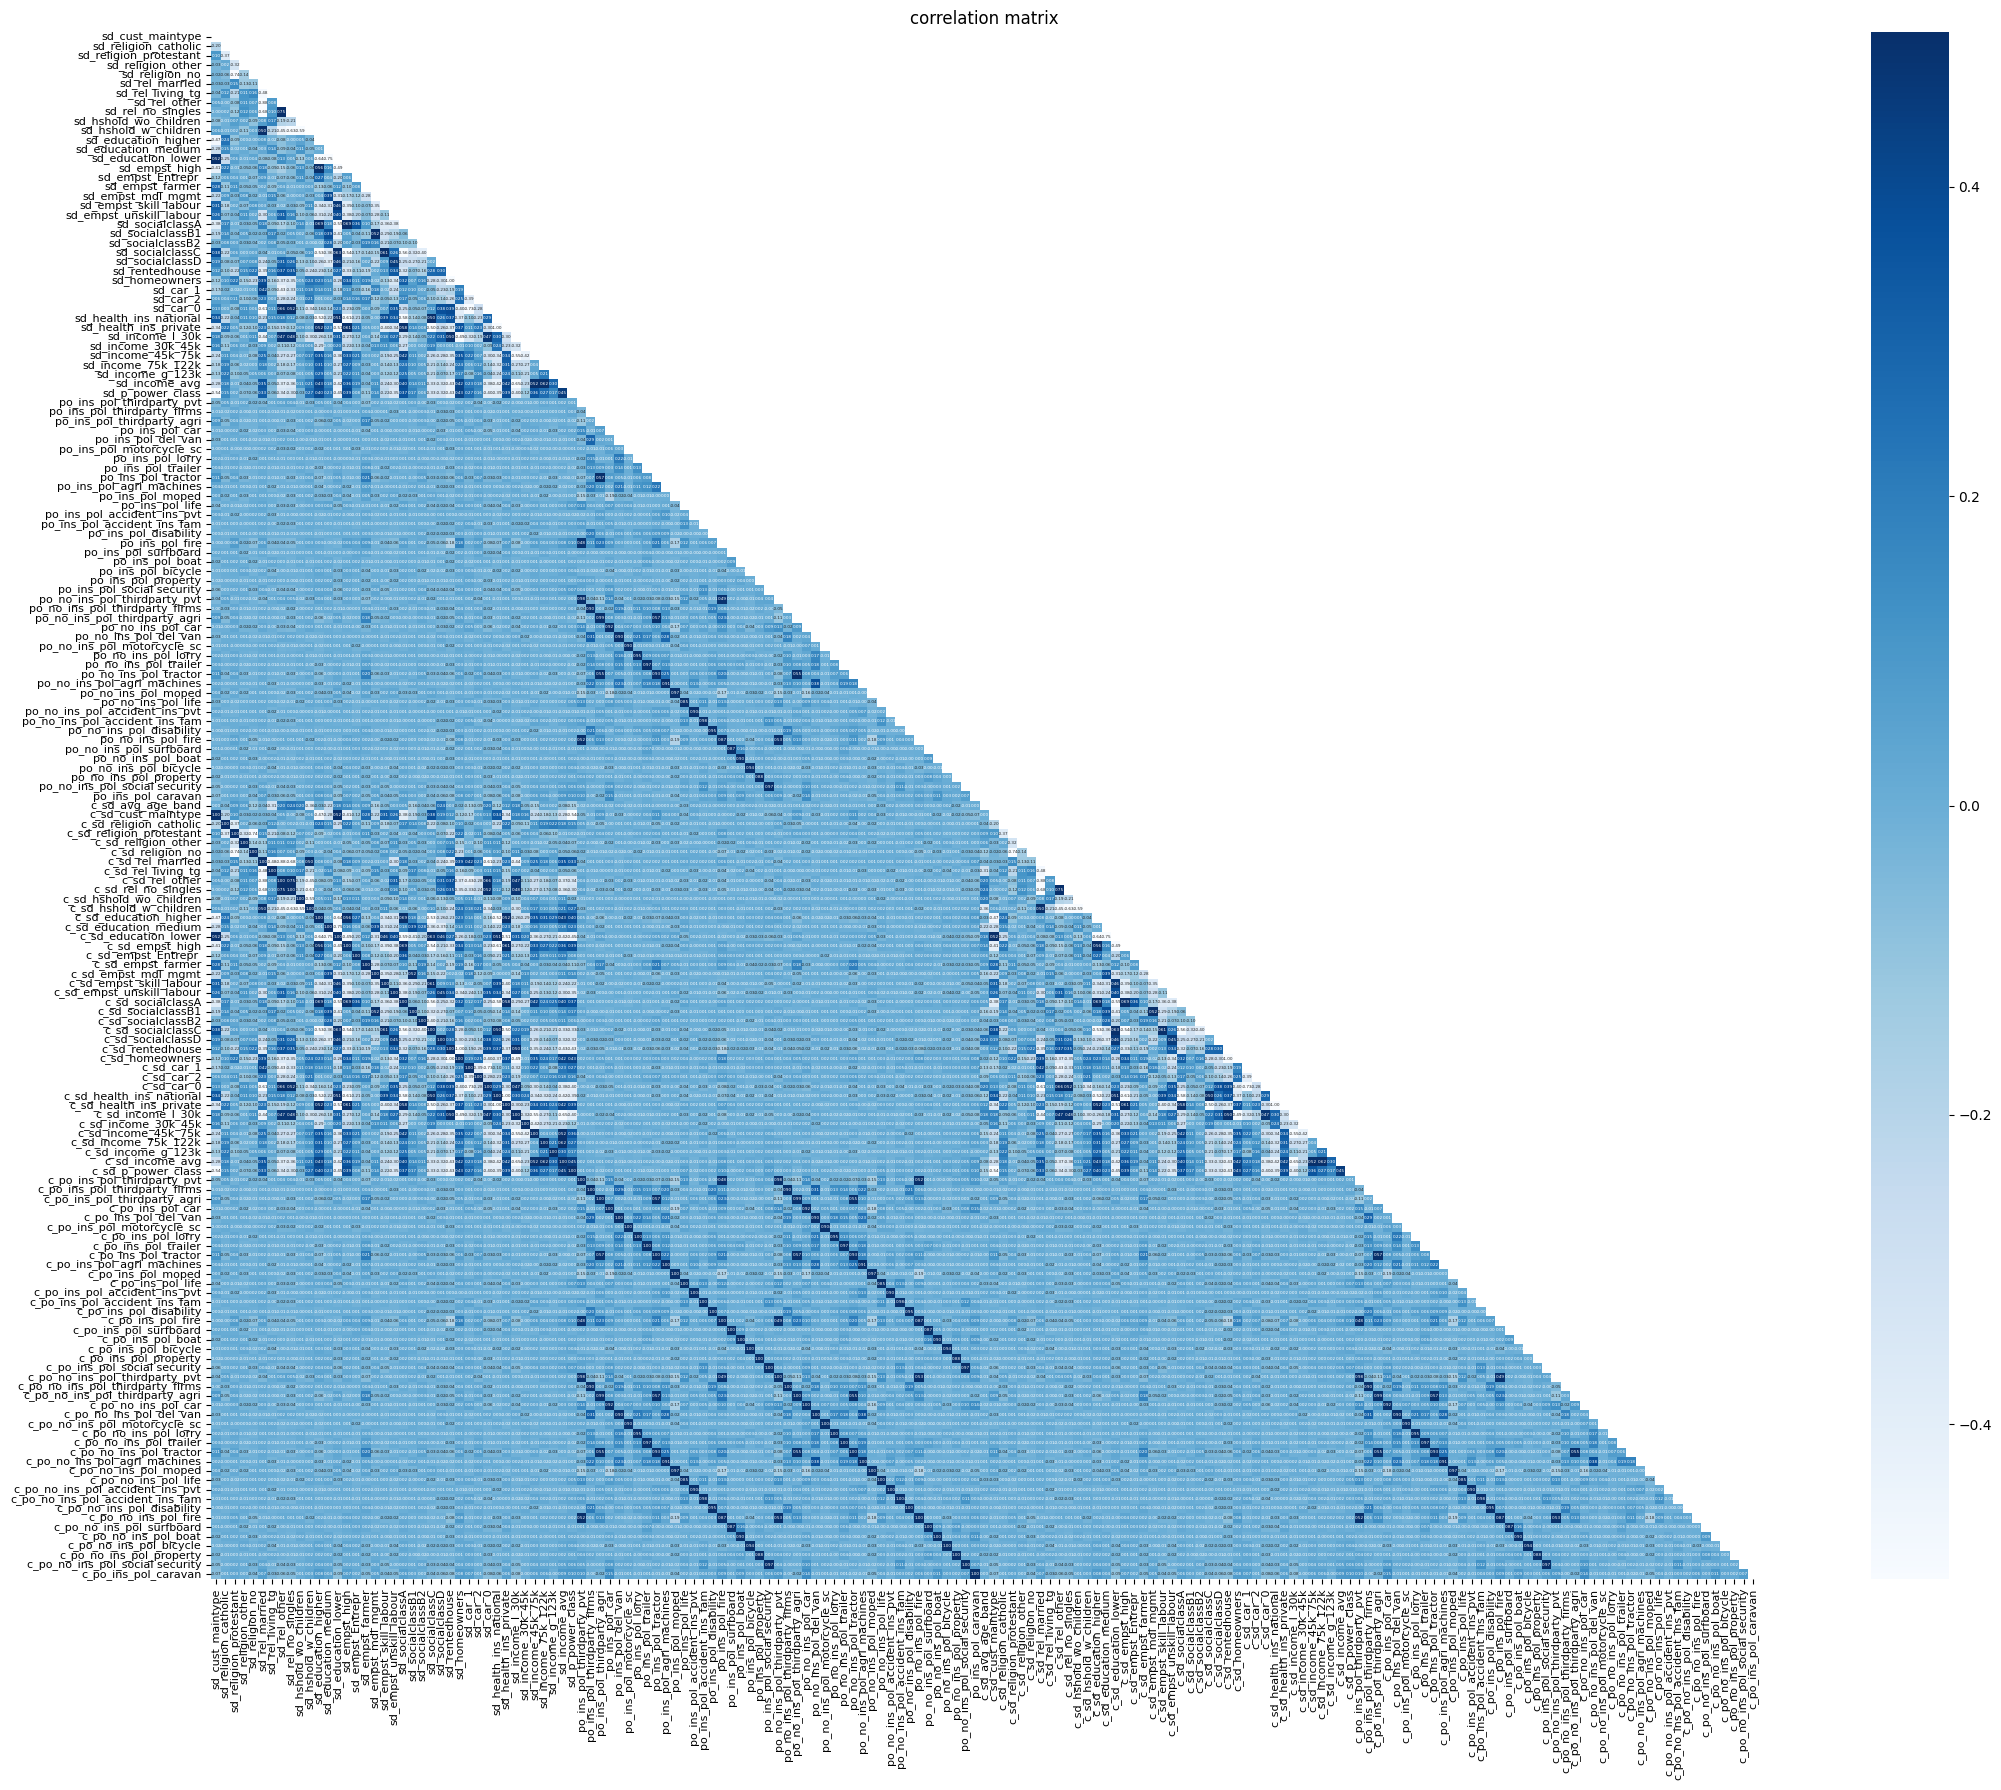

In [21]:
# print correlation matrix
print(plt.get_backend())

# close any existing plots
plt.close("all")

df = df_ori
# select out the desired columns
df = df.iloc[:, 3:].select_dtypes(include=['float64','int64'])

# copy columns to double size of dataframe
df2 = df.copy()
df2.columns = "c_" + df2.columns
df3 = pd.concat([df, df2], axis=1)

# get the correlation coefficient between the different columns
corr = df3.iloc[:, 1:].corr(method='pearson')
#arr_corr = corr.as_matrix()
arr_corr = corr.to_numpy()
# mask out the top triangle
arr_corr[np.triu_indices_from(arr_corr)] = np.nan

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

# can we create distinct profiles of Caravan Insurance customers based on sociodemographic data?

Customers of Caravan policy

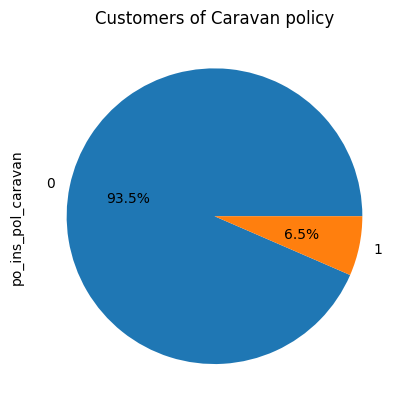

In [ ]:
summary5=df_3.po_ins_pol_caravan.value_counts()
summary5
summary5.plot.pie(autopct="%.1f%%",title="Customers of Caravan policy");


In [ ]:
summary5=df_3.po_ins_pol_caravan.value_counts()
summary5

0    4880
1     340
Name: po_ins_pol_caravan, dtype: int64

Text(0.5, 0, 'Number of Customers')

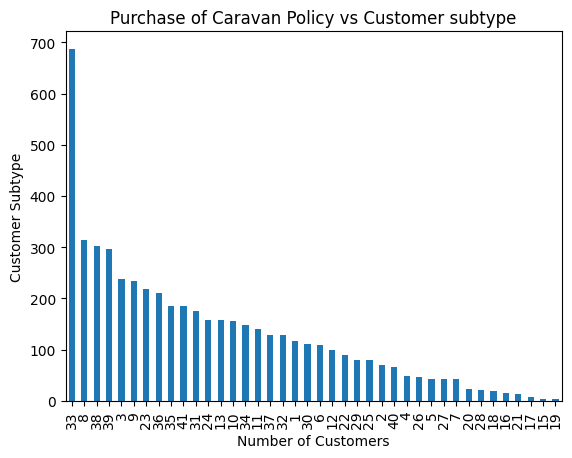

In [ ]:
summary6=df_3.sd_cust_subtype.value_counts()
summary6.plot(kind="bar")
plt.title("Purchase of Caravan Policy vs Customer subtype")
plt.ylabel("Customer Subtype")
plt.xlabel("Number of Customers")


Customer subtype description

33	Lower class large families

8	Middle class families

38	Traditional families

39	Large religous families


Text(0.5, 0, 'Number of Customers')

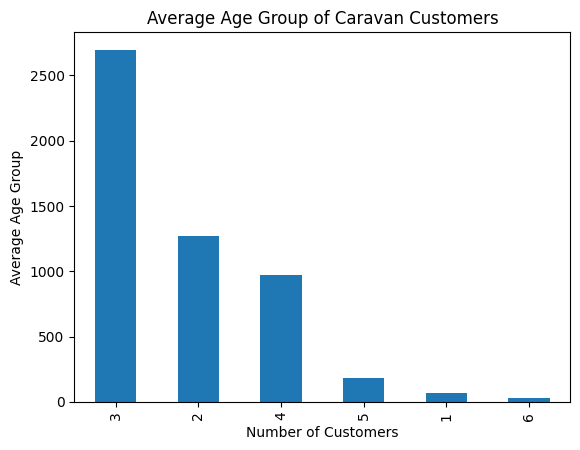

In [ ]:
summary7=df_3.sd_avg_age_band.value_counts()
summary7.plot(kind="bar")
plt.title("Average Age Group of Caravan Customers")
plt.ylabel("Average Age Group")
plt.xlabel("Number of Customers")


average age group bands

1 20-30 years

2 30-40 years

3 40-50 years

4 50-60 years

5 60-70 years

6 70-80 years

In [18]:
# scatter plots
df_3_carv2 = df_3[df_3['po_ins_pol_caravan'] ==1] # selecting caravan policies
df_3_carv4=df_3_carv2.iloc[:,0:43]


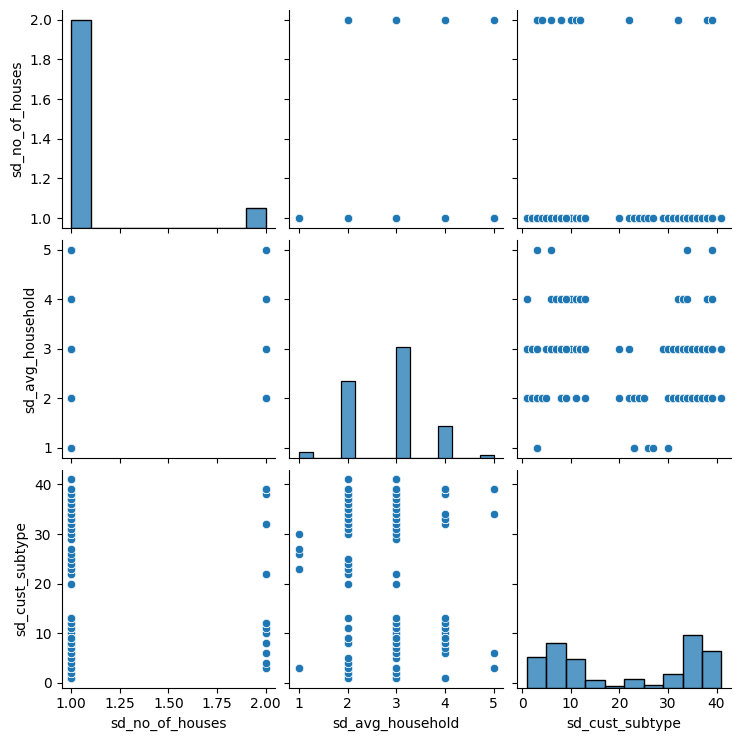

In [ ]:
g = sns.pairplot(df_3_carv4, vars=['sd_no_of_houses', 'sd_avg_household', 'sd_cust_subtype'])




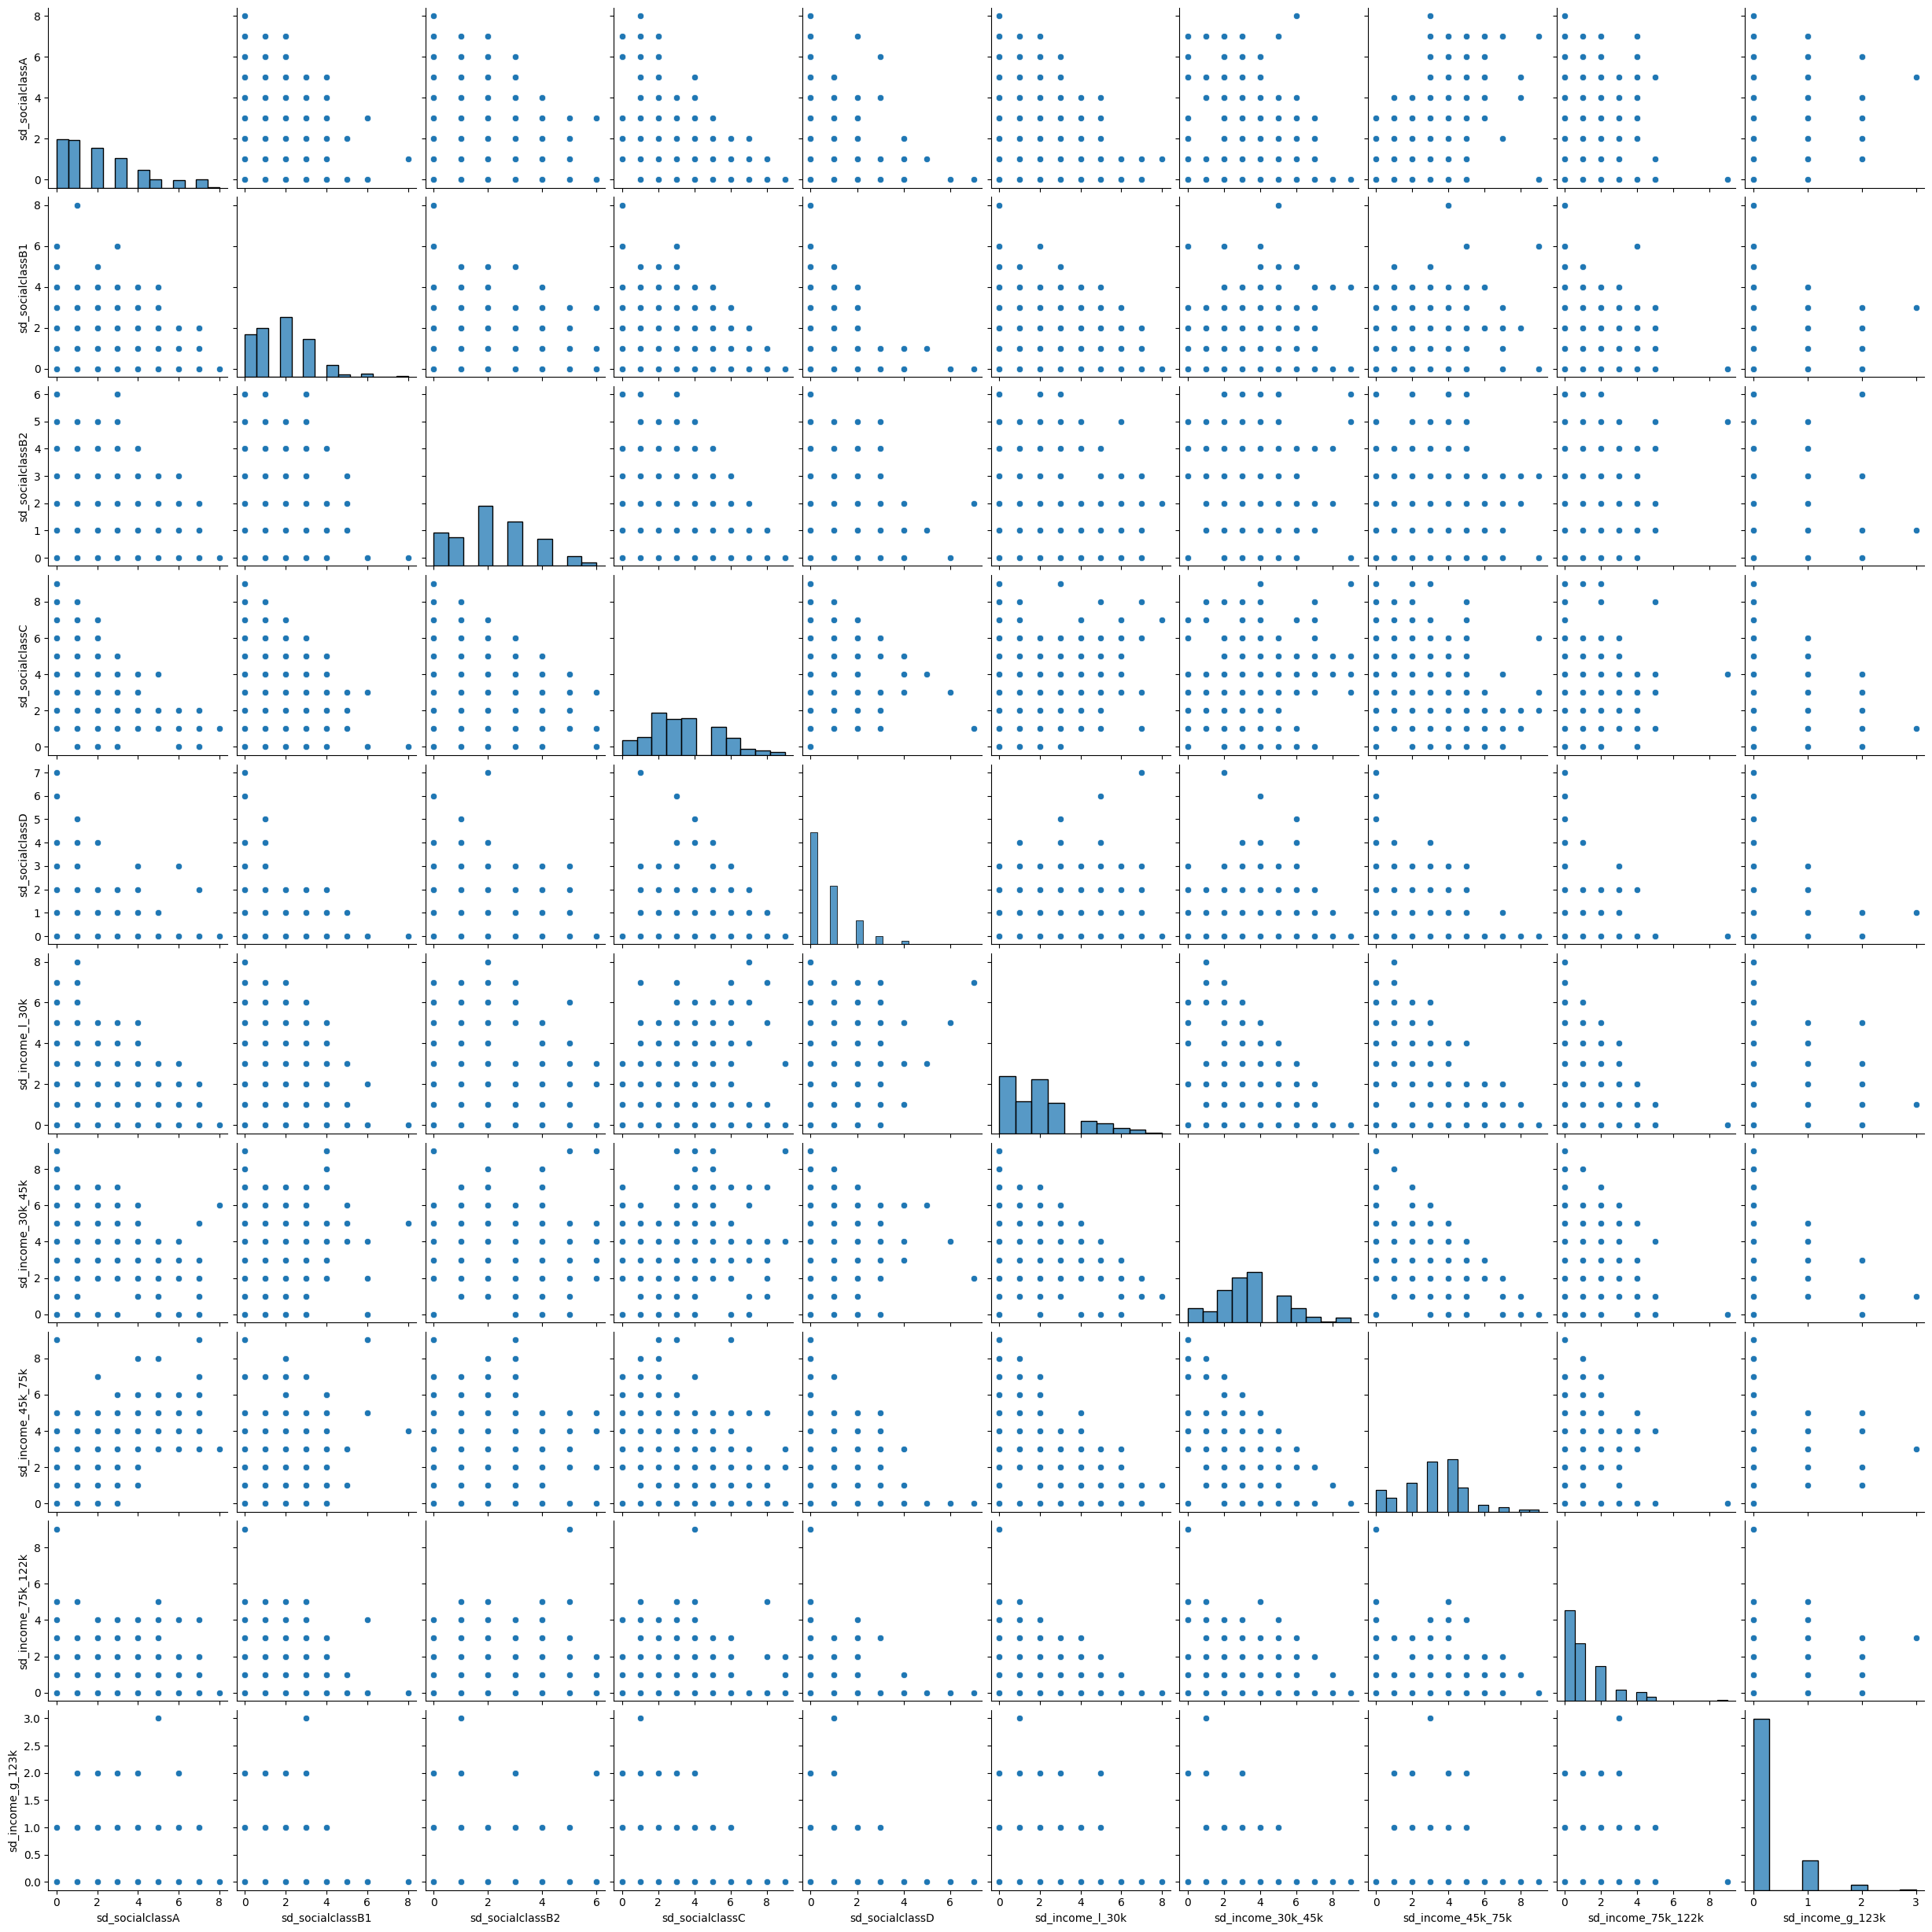

In [ ]:
g = sns.pairplot(df_3_carv4, vars=[ 'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ])



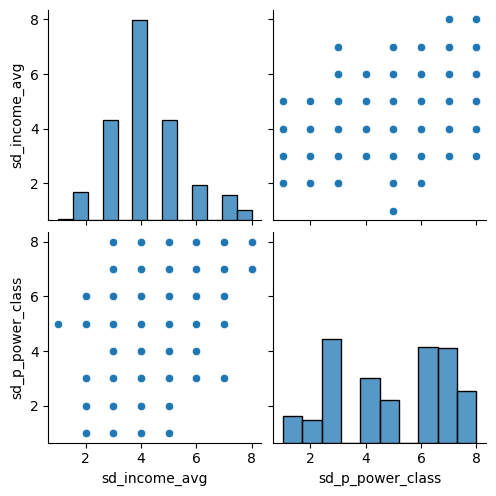

In [ ]:
g = sns.pairplot(df_3_carv4, vars=[ 'sd_income_avg', 'sd_p_power_class'])

In [ ]:
df_3_carv4.dtypes

sd_cust_subtype            int64
sd_no_of_houses            int64
sd_avg_household           int64
sd_avg_age_band            int64
sd_cust_maintype           int64
sd_religion_catholic       int64
sd_religion_protestant     int64
sd_religion_other          int64
sd_religion_no             int64
sd_rel_married             int64
sd_rel_living_tg           int64
sd_rel_other               int64
sd_rel_no_singles          int64
sd_hshold_wo_children      int64
sd_hshold_w_children       int64
sd_education_higher        int64
sd_education_medium        int64
sd_education_lower         int64
sd_empst_high              int64
sd_empst_Entrepr           int64
sd_empst_farmer            int64
sd_empst_mdl_mgmt          int64
sd_empst_skill_labour      int64
sd_empst_unskill_labour    int64
sd_socialclassA            int64
sd_socialclassB1           int64
sd_socialclassB2           int64
sd_socialclassC            int64
sd_socialclassD            int64
sd_rentedhouse             int64
sd_homeown

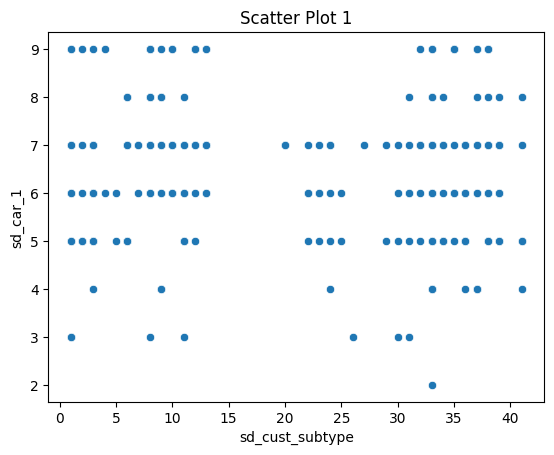

In [19]:
# Plotting Scatter Plots
sns.scatterplot(x='sd_cust_subtype', y='sd_car_1', data=df_3_carv4)
plt.title("Scatter Plot 1")
plt.show()

<ipython-input-20-5a57ff1331d0>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])


IndexError: ignored

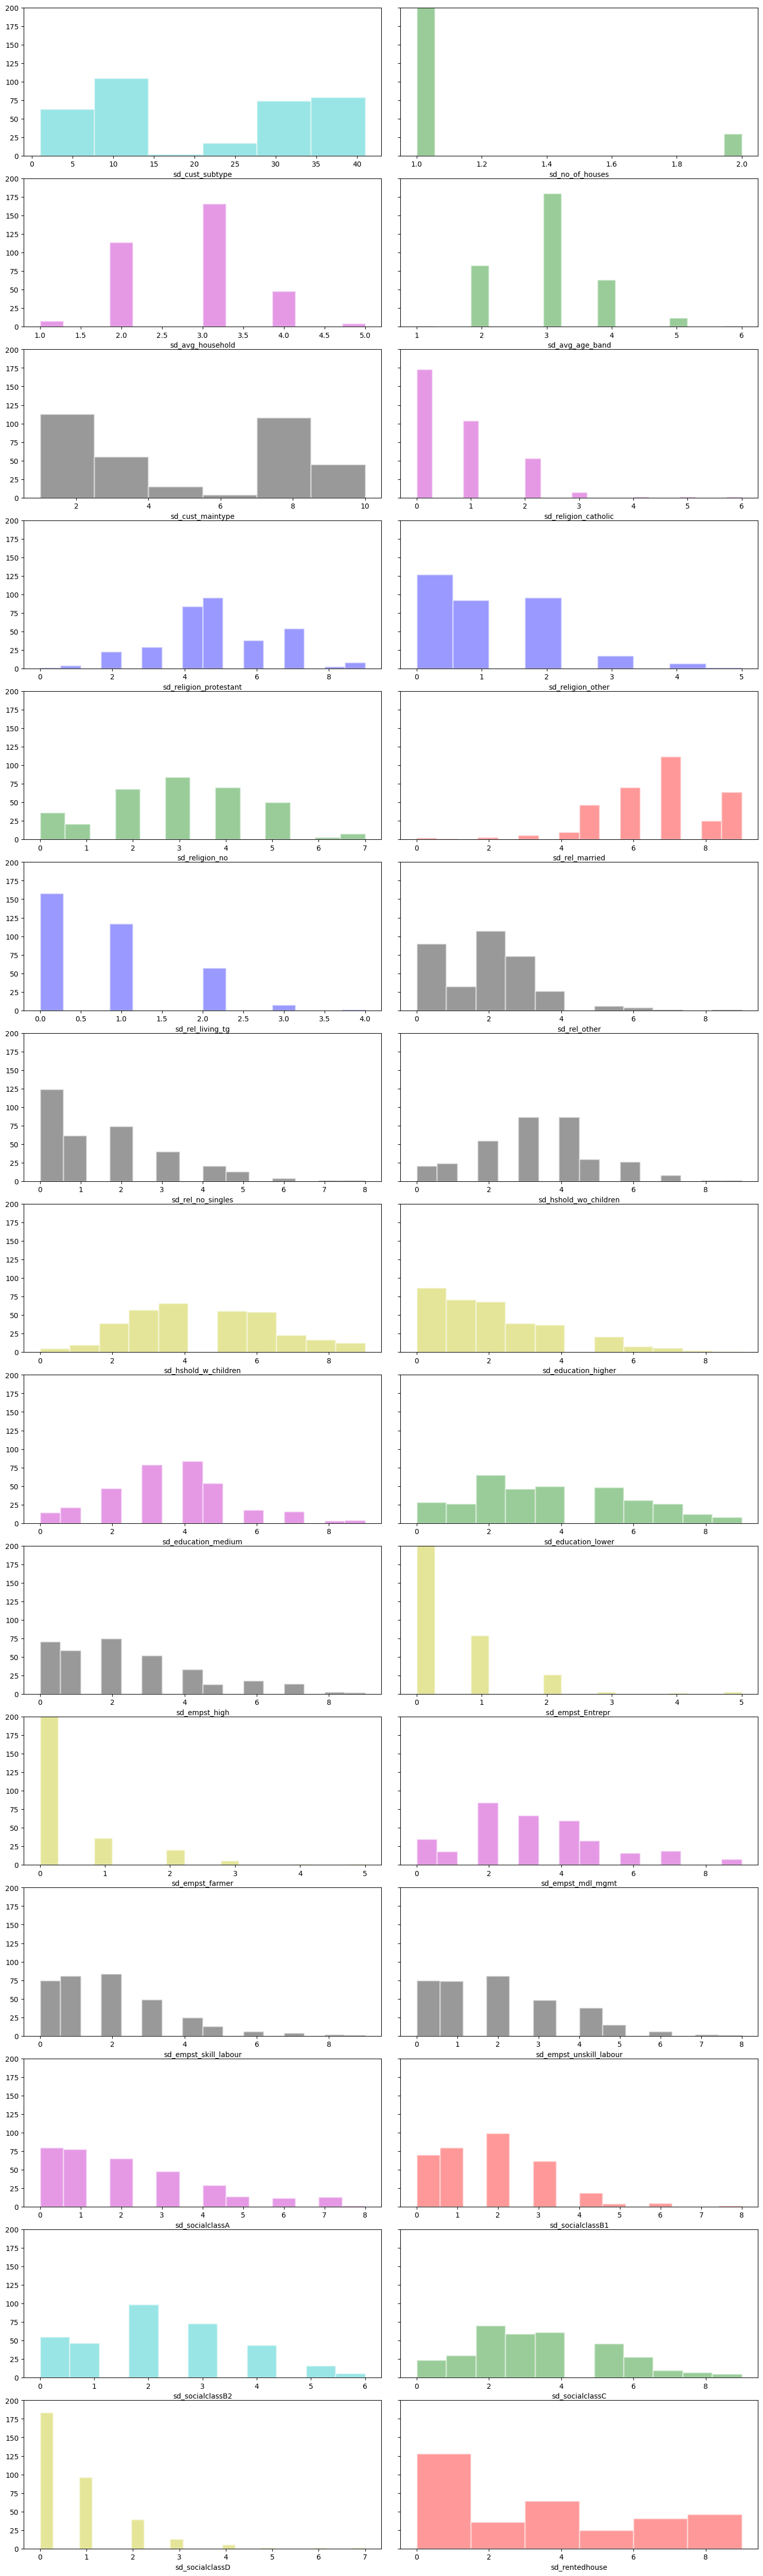

In [20]:
df = df_3_carv4
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =15,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(df.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(df[df.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

Examining a customer's likelihood to purchase Caravan Insurance based on their sociodemographic characteristics

In [23]:
# Create correlation matrix
corr_matrix = df_ori.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['sd_cust_maintype',
 'sd_religion_no',
 'sd_rel_other',
 'sd_rel_no_singles',
 'sd_hshold_w_children',
 'sd_education_lower',
 'sd_socialclassA',
 'sd_socialclassC',
 'sd_homeowners',
 'sd_car_0',
 'sd_health_ins_national',
 'sd_health_ins_private',
 'sd_income_avg',
 'po_no_ins_pol_thirdparty_pvt',
 'po_no_ins_pol_thirdparty_firms',
 'po_no_ins_pol_thirdparty_agri',
 'po_no_ins_pol_car',
 'po_no_ins_pol_del_van',
 'po_no_ins_pol_motorcycle_sc',
 'po_no_ins_pol_lorry',
 'po_no_ins_pol_trailer',
 'po_no_ins_pol_tractor',
 'po_no_ins_pol_agri_machines',
 'po_no_ins_pol_moped',
 'po_no_ins_pol_life',
 'po_no_ins_pol_accident_ins_pvt',
 'po_no_ins_pol_accident_ins_fam',
 'po_no_ins_pol_disability',
 'po_no_ins_pol_fire',
 'po_no_ins_pol_surfboard',
 'po_no_ins_pol_boat',
 'po_no_ins_pol_bicycle',
 'po_no_ins_pol_property',
 'po_no_ins_pol_social security']

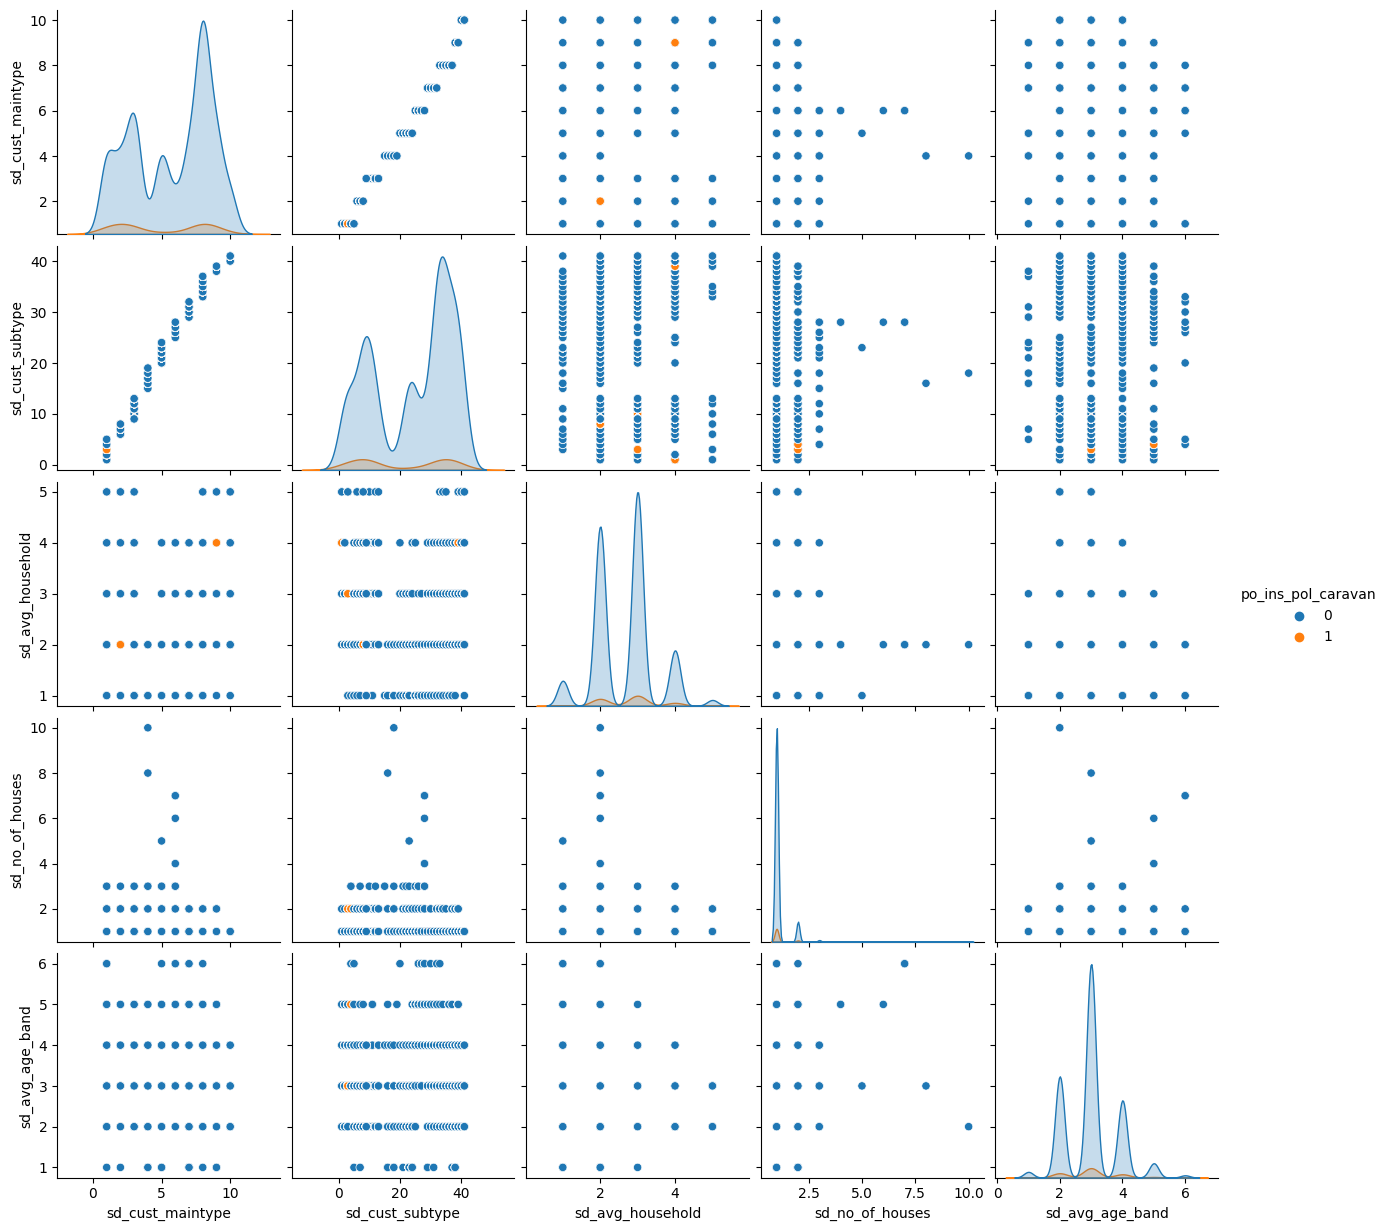

In [35]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
df_3s1=df_3[["sd_cust_maintype",  "sd_cust_subtype", "sd_avg_household", "sd_no_of_houses", "sd_avg_age_band", "po_ins_pol_caravan"]]
sns.pairplot(df_3s1, hue="po_ins_pol_caravan")

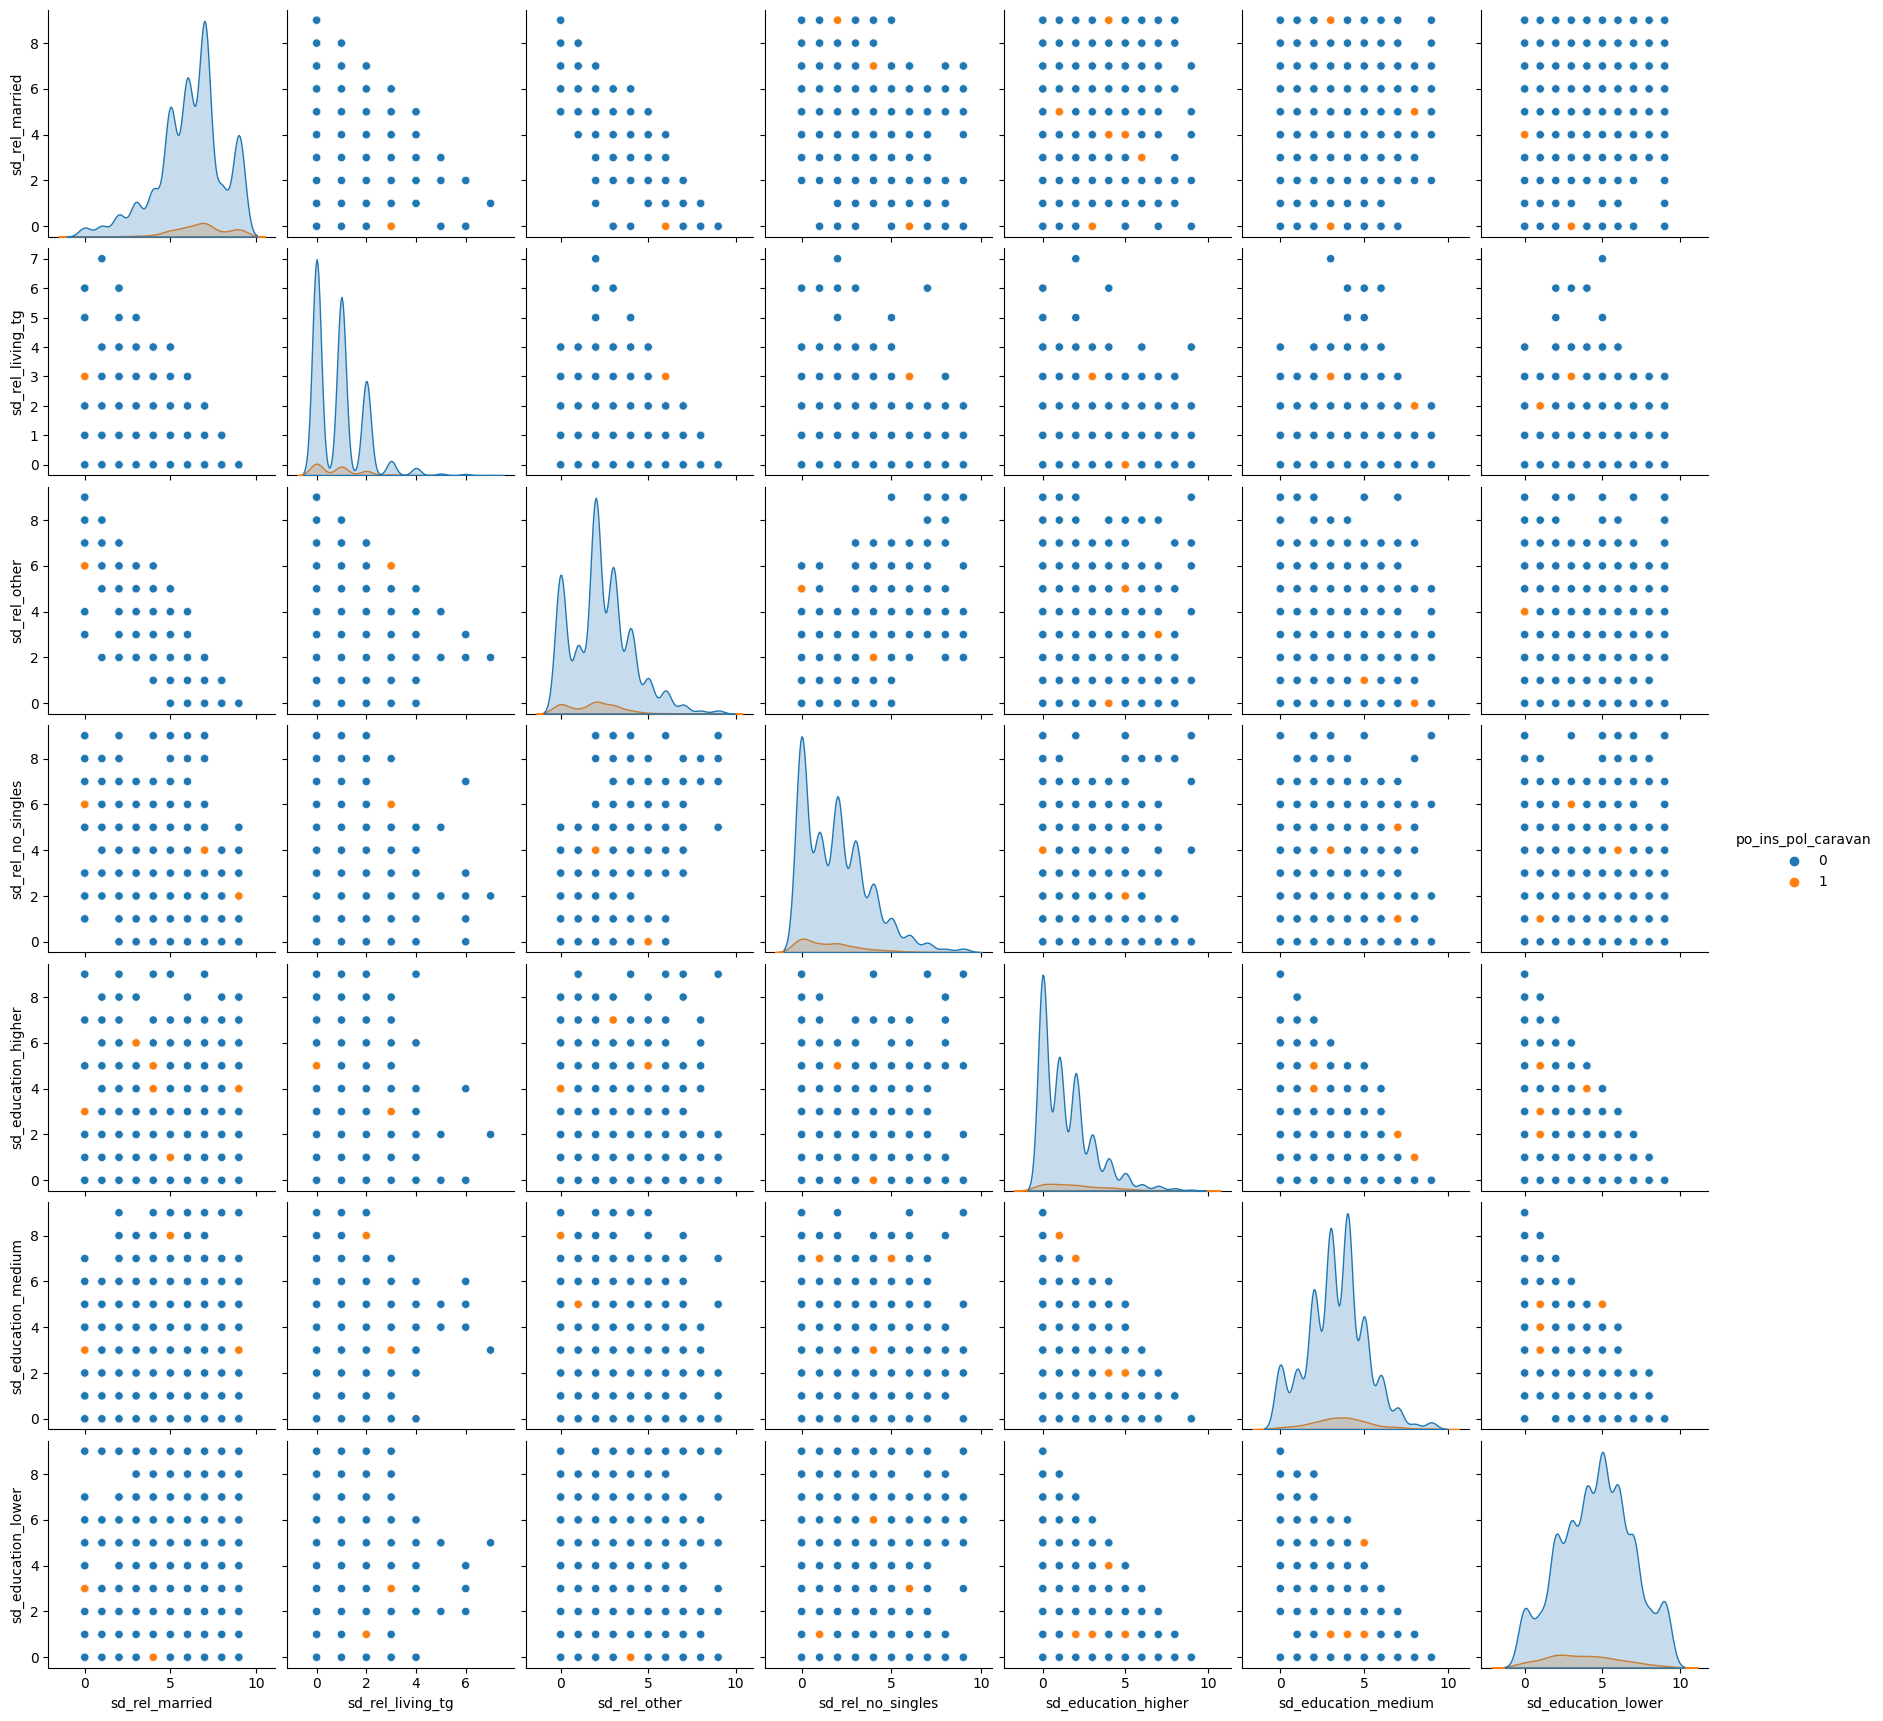

In [37]:
df_3s2=df_3[["sd_rel_married" ,  "sd_rel_living_tg" ,  "sd_rel_other" ,  "sd_rel_no_singles",  "sd_education_higher",	"sd_education_medium",	 "sd_education_lower" , "po_ins_pol_caravan"]]
sns.pairplot(df_3s2, hue="po_ins_pol_caravan")

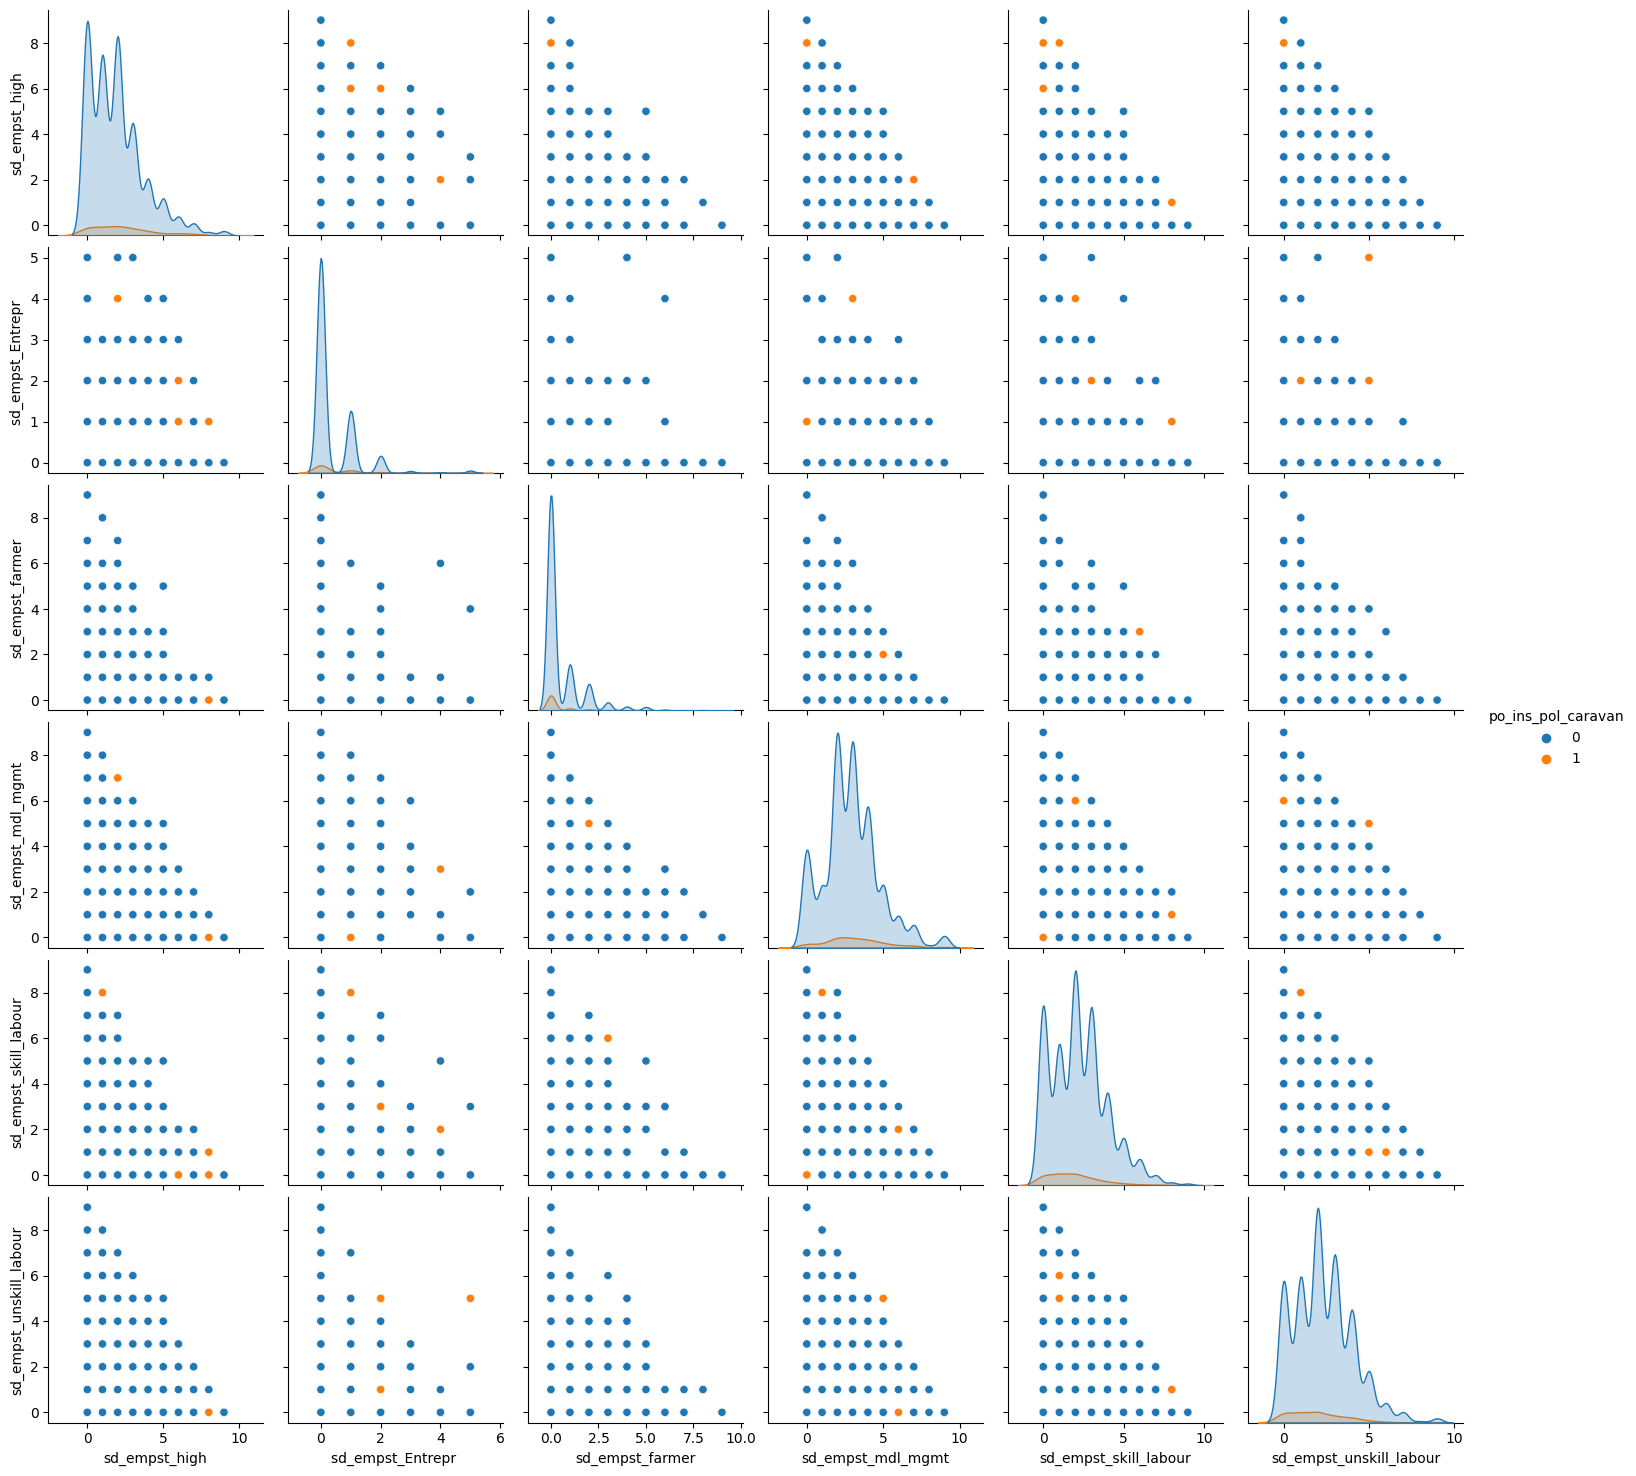

In [40]:
 df_3s2=df_3[["sd_empst_high",	 "sd_empst_Entrepr ", 	"sd_empst_farmer", 	"sd_empst_mdl_mgmt",	 "sd_empst_skill_labour",	 "sd_empst_unskill_labour", "po_ins_pol_caravan"]]
 sns.pairplot(df_3s2, hue="po_ins_pol_caravan")

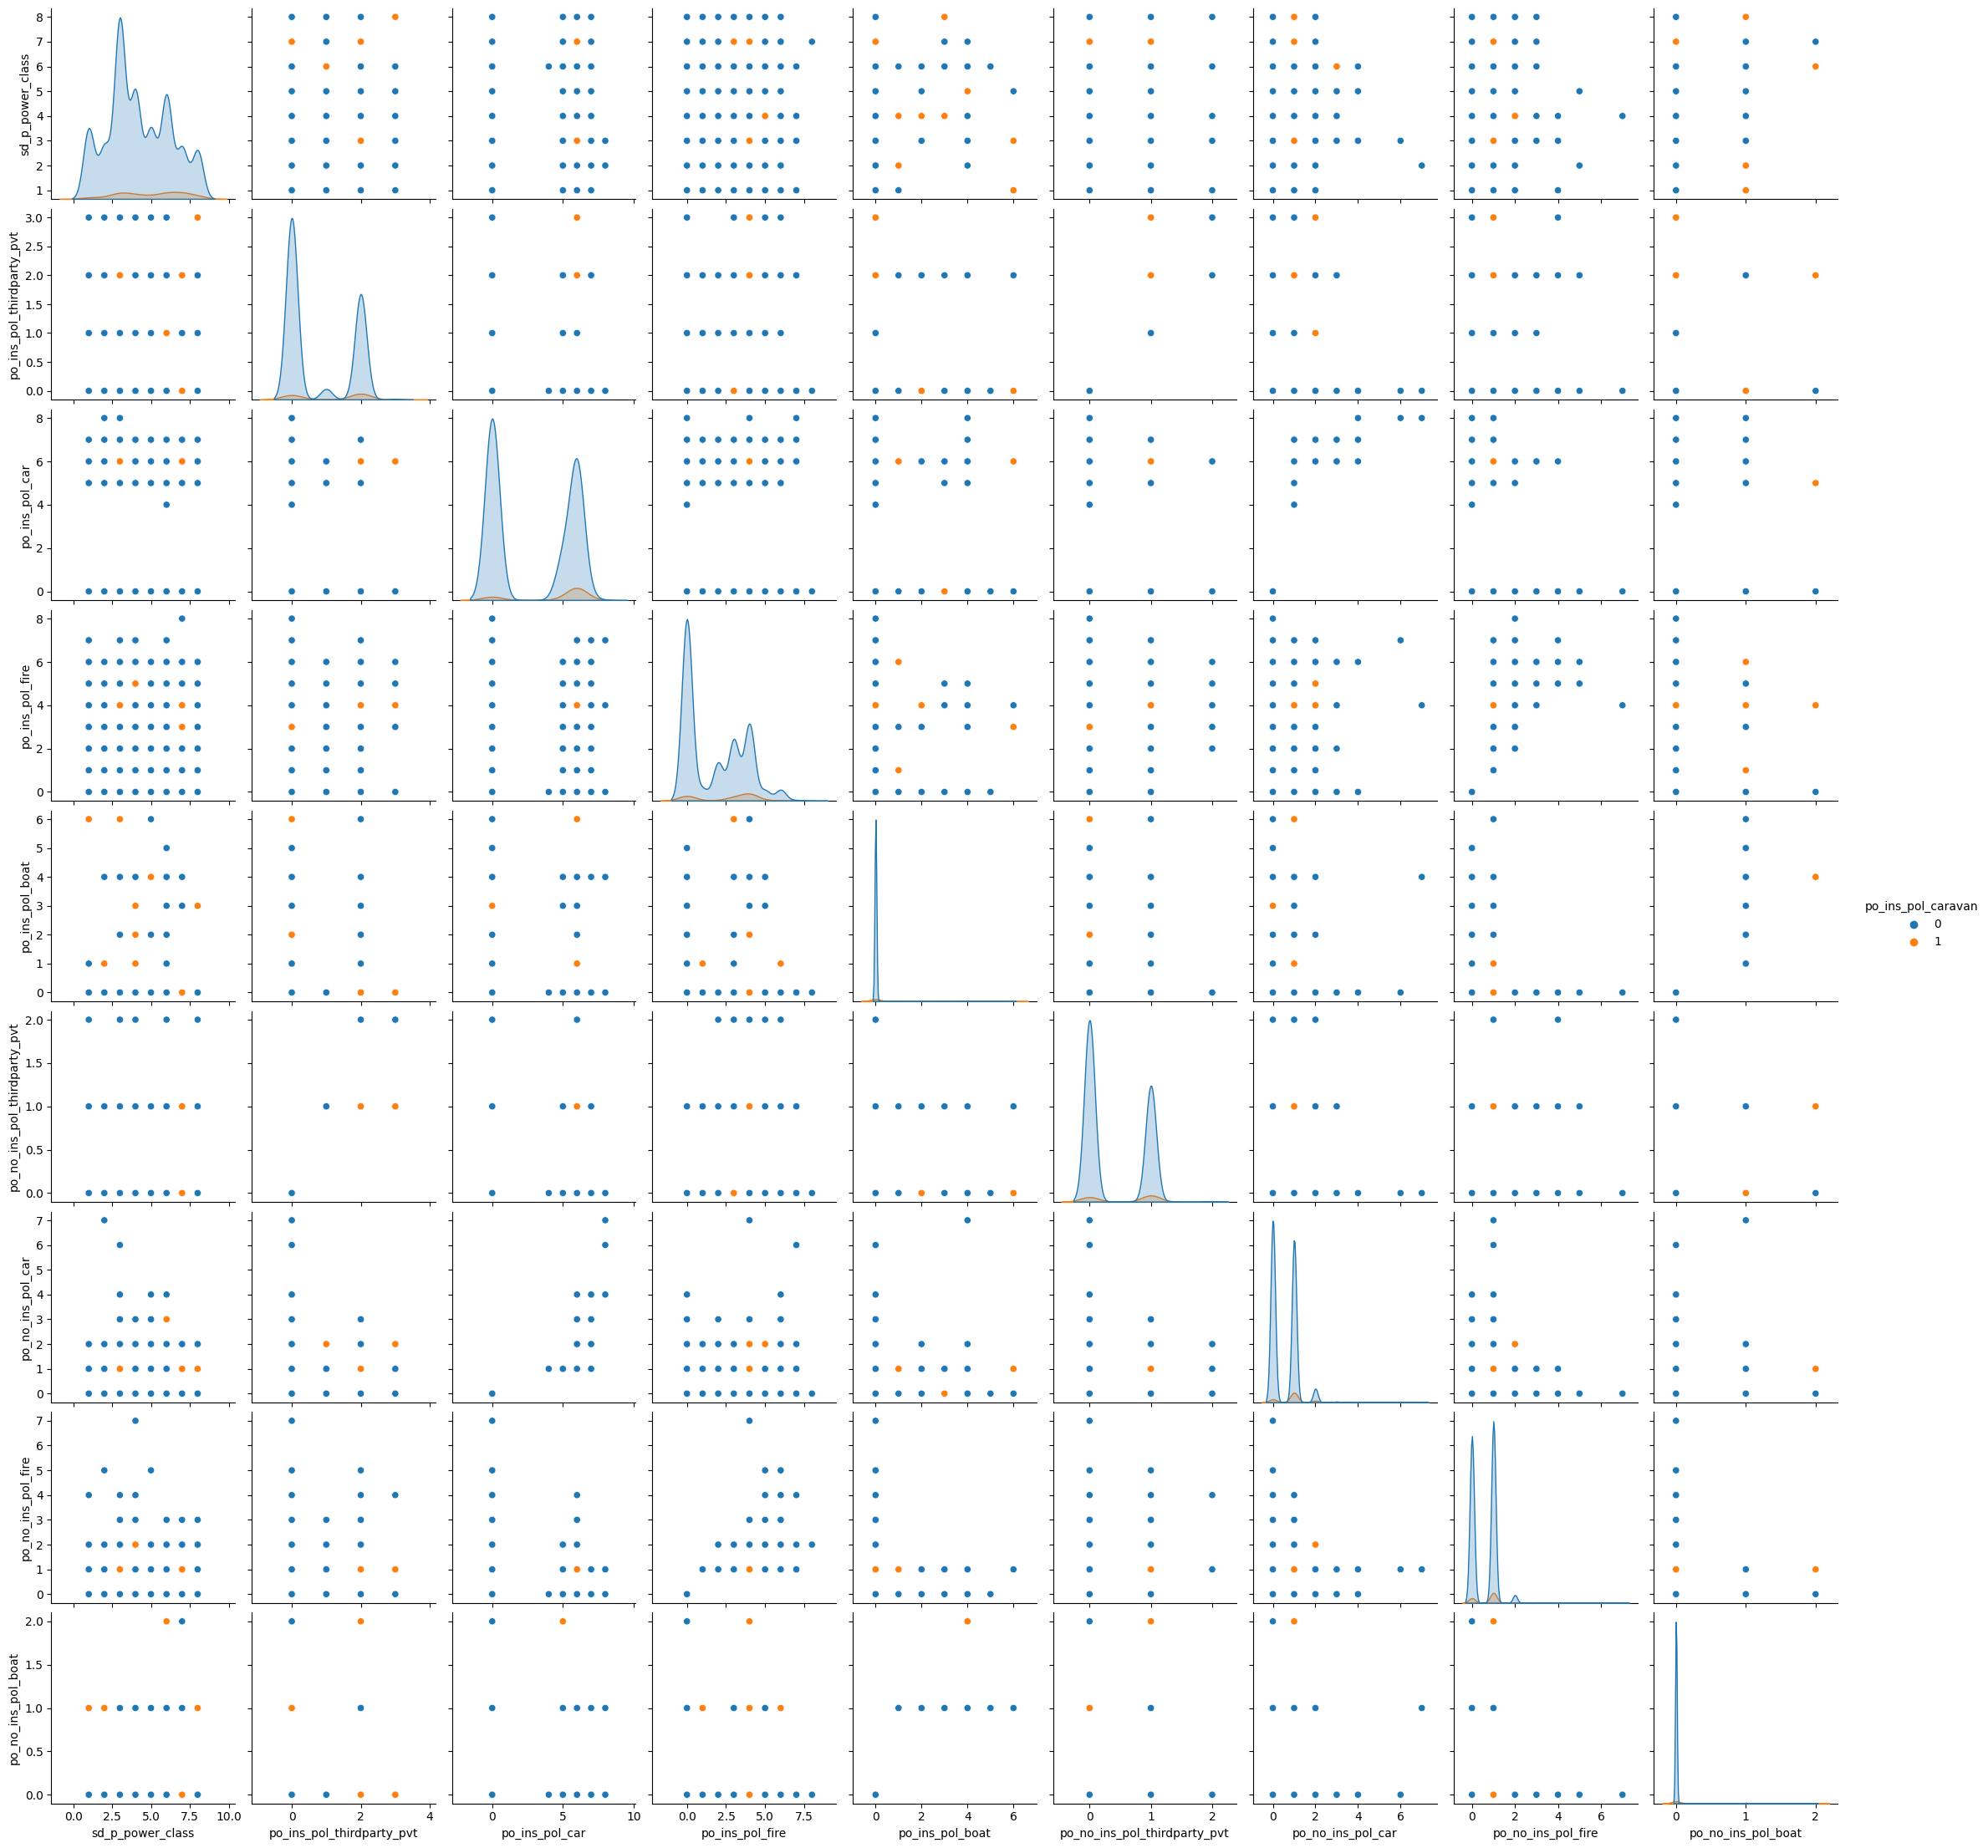

In [43]:

 df_3s3=df_ori[['sd_p_power_class',	'po_ins_pol_thirdparty_pvt',	'po_ins_pol_car',	'po_ins_pol_fire',	'po_ins_pol_boat',	'po_no_ins_pol_thirdparty_pvt',	'po_no_ins_pol_car',	'po_no_ins_pol_fire',	'po_no_ins_pol_boat','po_ins_pol_caravan']]
 sns.pairplot(df_3s3, hue="po_ins_pol_caravan")
